In [1]:
import pandas as pd
import numpy as np
import multiprocessing as mp
import matplotlib.pyplot as plt

In [5]:
# Read the CSV file
df = pd.read_csv('ScanNA1.csv')
df=df.dropna()
(3*(len(df)/52))/60
# print(df)

189.02788461538464

In [3]:
# Read the CSV file
# df = pd.read_csv('scan7Clean.csv.zip')
# display(df)
# print(df['axLenght'])
# # Number of threads to use
# num_threads = mp.cpu_count()  # Use the number of available CPU cores
# # Split the DataFrame into chunks based on the number of threads
# chunks = np.array_split(df, num_threads)

In [4]:
from neat.fields import StellnaQS
from neat.tracing import ChargedParticleEnsemble, ParticleEnsembleOrbit


B0 = 5.3267  # Tesla, magnetic field on-axis
Rmajor_ARIES = 7.7495*2
Rminor_ARIES = 1.7044


g_field_basis = StellnaQS(rc=[1,df['rc1'][0]], zs= [0,df['zs1'][0]], etabar=df['eta'][0], B0=B0, nfp=df['nfp'][0], order='r1', nphi=401)
g_field = StellnaQS(rc=g_field_basis.rc*Rmajor_ARIES, zs=g_field_basis.zs*Rmajor_ARIES, \
                        etabar=g_field_basis.etabar/Rmajor_ARIES, B2c=g_field_basis.B2c*(B0/Rmajor_ARIES/Rmajor_ARIES),\
                            B0=B0, nfp=g_field_basis.nfp, order='r1', nphi=41)

# g_field.plot_boundary(r=Rminor_ARIES)


In [5]:
r_initial = Rminor_ARIES*0.75  # meters
r_max = Rminor_ARIES*0.99  # meters

energy = 3.52e6  # electron-volt
charge = 2  # times charge of proton
mass = 4  # times mass of proton
ntheta = 20  # resolution in theta
nphi = 20  # resolution in phi
nlambda_trapped = 5  # number of pitch angles for trapped particles
nlambda_passing = 0  # number of pitch angles for passing particles

g_particle = ChargedParticleEnsemble(
    r_initial=r_initial,
    r_max=r_max,
    energy=energy,
    charge=charge,
    mass=mass,
    ntheta=ntheta,
    nphi=nphi,
    nlambda_trapped=nlambda_trapped,
    nlambda_passing=nlambda_passing
)

In [6]:
print("Starting particle tracer with B20 constant")
constant_b20 = True
nsamples = 10000  # resolution in time
tfinal = 1e-4  # seconds
dist = 0
thetas = np.linspace(0, 2*np.pi, ntheta)
varphis = np.linspace(0, 2*np.pi/df['nfp'][0], nphi)

g_orbits = ParticleEnsembleOrbit(
    g_particle,
    g_field,
    nsamples=nsamples,
    nthreads=1,
    tfinal=tfinal,
    constant_b20=constant_b20,
    dist=dist,
    thetas=thetas,
    phis=varphis
)

Starting particle tracer with B20 constant


In [7]:
loss_fraction = g_orbits.loss_fraction(r_max=r_max, jacobian_weight=True)
print(g_orbits.loss_fraction_array[-1])

0.0


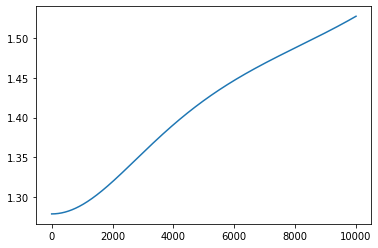

In [8]:
plt.plot(g_orbits.r_pos[5])
plt.show()

In [9]:
# Concatenate the results into a single DataFrame
df['Loss Fraction'] = loss_fraction[0]*len(df['nfp'])

In [10]:
# Save the modified DataFrame back to the CSV file
df.to_csv('your_file_with_loss_fraction.csv', index=False)

In [12]:
print(f'We have {len(g_orbits.r_pos)} particles')

We have 4000 particles


In [15]:
for i in np.arange(len(df)):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
